# Recurrent Neural Network

![LSTM](imgs/LSTM3-chain.png)

![LSTM](imgs/LSTM2-notation.png)



![LSTM](imgs/LSTM3-focus-f.png)

![LSTM](imgs/LSTM3-focus-i.png)

![LSTM](imgs/LSTM3-focus-C.png)

![LSTM](imgs/LSTM3-focus-o.png)

## From pytorch documentation

\begin{array}{ll} \\
    f_t = \sigma(W_{if} x_t + b_{if} + W_{hf} h_{(t-1)} + b_{hf}) \\
    i_t = \sigma(W_{ii} x_t + b_{ii} + W_{hi} h_{(t-1)} + b_{hi}) \\
    g_t = \tanh(W_{ig} x_t + b_{ig} + W_{hg} h_{(t-1)} + b_{hg}) \\
    c_t = f_t * c_{(t-1)} + i_t * g_t \\
    o_t = \sigma(W_{io} x_t + b_{io} + W_{ho} h_{(t-1)} + b_{ho}) \\    
    h_t = o_t * \tanh(c_t) \\
\end{array}

## How to define LSTM layer in pytorch

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

batch_size = 2
seq_len = 10
input_size = 3
hidden_size = 4 

inputs = torch.randn(seq_len, batch_size, input_size)
inputs

tensor([[[ 1.4555,  0.7465, -0.9415],
         [-1.1096, -0.6533,  0.7203]],

        [[-0.3836, -0.3617,  0.8822],
         [ 0.1445,  1.7087,  0.3034]],

        [[ 1.8307, -0.7956, -0.9783],
         [-0.9901,  0.6492, -0.4896]],

        [[ 1.0044,  0.1137, -0.6549],
         [ 0.4077,  0.1702,  1.5962]],

        [[ 0.4822,  0.1461,  0.8689],
         [ 1.3198, -0.6380, -0.6823]],

        [[ 0.0273, -0.4202, -0.7030],
         [ 0.7543,  0.8357, -1.2389]],

        [[-0.1848, -0.9312, -0.7273],
         [-0.6170, -1.4889, -1.0162]],

        [[-0.0296,  1.4472, -0.3702],
         [ 2.3862,  0.8240, -0.9050]],

        [[-1.3517,  1.0657,  0.5884],
         [ 0.4590, -0.5893, -0.8926]],

        [[-0.4153, -1.4629,  0.3760],
         [ 1.6195, -0.4756,  0.7551]]])

In [2]:
lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size)

In [3]:
## hidden_0 = (h_0, c_0)
hidden_0 = (torch.zeros(1, batch_size, hidden_size), torch.zeros(1, batch_size, hidden_size))

In [4]:
lstm_out, lstm_hidden = lstm(inputs)
lstm_out.shape

torch.Size([10, 2, 4])

In [5]:
lstm_out

tensor([[[-0.0247,  0.1507, -0.0803,  0.0449],
         [-0.1006, -0.0147,  0.2621,  0.0776]],

        [[-0.0708,  0.0842,  0.2027,  0.0979],
         [-0.1715,  0.0161,  0.2130,  0.0533]],

        [[ 0.1210,  0.1712,  0.1224,  0.2107],
         [-0.2133,  0.0502,  0.1296,  0.0397]],

        [[ 0.0395,  0.2172,  0.1012,  0.1445],
         [ 0.0055,  0.0087,  0.2190,  0.0872]],

        [[ 0.0158,  0.1562,  0.2057,  0.1249],
         [ 0.1115,  0.1357,  0.1783,  0.1808]],

        [[-0.0521,  0.1595,  0.1960,  0.1263],
         [-0.0299,  0.1944,  0.0040,  0.0803]],

        [[-0.0573,  0.1361,  0.2098,  0.1501],
         [-0.0741,  0.1172,  0.1170,  0.1334]],

        [[-0.1661,  0.1290,  0.0922,  0.0616],
         [ 0.0158,  0.2274, -0.0029,  0.1340]],

        [[-0.2746, -0.0124,  0.2156,  0.0354],
         [-0.0274,  0.2116,  0.0389,  0.1419]],

        [[ 0.0211,  0.0557,  0.2625,  0.1923],
         [ 0.1903,  0.2360,  0.1382,  0.1859]]], grad_fn=<StackBackward>)

If we want to put hidden inputs to zeros, there is no need to provide them.

In [6]:
lstm_out, lstm_hidden = lstm(inputs)
lstm_out

tensor([[[-0.0247,  0.1507, -0.0803,  0.0449],
         [-0.1006, -0.0147,  0.2621,  0.0776]],

        [[-0.0708,  0.0842,  0.2027,  0.0979],
         [-0.1715,  0.0161,  0.2130,  0.0533]],

        [[ 0.1210,  0.1712,  0.1224,  0.2107],
         [-0.2133,  0.0502,  0.1296,  0.0397]],

        [[ 0.0395,  0.2172,  0.1012,  0.1445],
         [ 0.0055,  0.0087,  0.2190,  0.0872]],

        [[ 0.0158,  0.1562,  0.2057,  0.1249],
         [ 0.1115,  0.1357,  0.1783,  0.1808]],

        [[-0.0521,  0.1595,  0.1960,  0.1263],
         [-0.0299,  0.1944,  0.0040,  0.0803]],

        [[-0.0573,  0.1361,  0.2098,  0.1501],
         [-0.0741,  0.1172,  0.1170,  0.1334]],

        [[-0.1661,  0.1290,  0.0922,  0.0616],
         [ 0.0158,  0.2274, -0.0029,  0.1340]],

        [[-0.2746, -0.0124,  0.2156,  0.0354],
         [-0.0274,  0.2116,  0.0389,  0.1419]],

        [[ 0.0211,  0.0557,  0.2625,  0.1923],
         [ 0.1903,  0.2360,  0.1382,  0.1859]]], grad_fn=<StackBackward>)

Finally the last output is the output of RRR. We can get it by

In [7]:
lstm_out[-1]

tensor([[0.0211, 0.0557, 0.2625, 0.1923],
        [0.1903, 0.2360, 0.1382, 0.1859]], grad_fn=<SelectBackward>)

It is often convient to have batches as the first dimension of the input. One can do it by adding `batch_first=True` parameter.

In [8]:
lstm_batch_first = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True) 
inputs_batch_first = torch.randn(batch_size, seq_len, input_size)
inputs_batch_first

tensor([[[-2.4907, -1.0625,  0.2827],
         [-1.1621,  0.9900, -0.2673],
         [-0.0923,  0.5844,  3.0635],
         [ 0.6826,  0.6106,  1.3191],
         [ 1.0280, -1.5714,  1.5271],
         [ 0.2480, -1.4963, -0.6572],
         [ 0.5456,  0.4040, -0.1535],
         [-0.6119, -1.3854,  0.8752],
         [ 1.4831, -0.1826, -1.7904],
         [ 0.2595, -0.7559,  0.9015]],

        [[-0.7472,  1.1277,  0.6444],
         [-2.2725,  0.6541, -0.9927],
         [ 0.0994, -1.6477,  0.0856],
         [ 1.3480, -0.5456, -1.0172],
         [-0.0205,  1.1389, -1.0796],
         [-0.6449,  0.0679, -1.2483],
         [-1.4658,  2.0072, -3.1096],
         [ 0.6833, -0.7477,  0.5068],
         [ 1.1615,  0.8511,  0.8350],
         [-0.7869, -0.9565,  1.2470]]])

In [9]:
lstm_out, lstm_hidden = lstm_batch_first(inputs_batch_first)
lstm_out

tensor([[[-0.0348,  0.1034,  0.2218, -0.2388],
         [-0.2543,  0.1988,  0.1634, -0.2615],
         [-0.2844,  0.0665,  0.2403, -0.0455],
         [-0.3628,  0.1032,  0.2150, -0.0100],
         [ 0.0965, -0.1670,  0.1680, -0.0118],
         [ 0.3601, -0.0077,  0.1550, -0.0782],
         [ 0.0623,  0.1175,  0.1592, -0.0867],
         [ 0.1381, -0.0117,  0.2611, -0.1187],
         [ 0.2118,  0.1741,  0.1319, -0.0632],
         [ 0.0944,  0.0303,  0.2591, -0.0843]],

        [[-0.1982,  0.1185,  0.1512, -0.1193],
         [-0.2959,  0.2146,  0.1699, -0.3551],
         [ 0.1608,  0.0091,  0.2493, -0.1322],
         [ 0.2374,  0.0966,  0.1648, -0.0909],
         [-0.1051,  0.2336,  0.1304, -0.1782],
         [-0.1333,  0.2966,  0.1963, -0.2213],
         [-0.3090,  0.3673,  0.0648, -0.4083],
         [-0.0439,  0.1211,  0.2816, -0.1242],
         [-0.1705,  0.1398,  0.2142, -0.0329],
         [-0.0741,  0.0487,  0.2913, -0.1061]]], grad_fn=<TransposeBackward0>)

Then we get the finial output by:

In [10]:
lstm_out[:, -1]

tensor([[ 0.0944,  0.0303,  0.2591, -0.0843],
        [-0.0741,  0.0487,  0.2913, -0.1061]], grad_fn=<SelectBackward>)

## Embedings

In [11]:
dict_size = 100
sentences = torch.randint(dict_size, (batch_size, seq_len))
sentences

tensor([[15, 42, 35, 98, 95,  6, 21, 33, 27, 33],
        [67, 85, 76, 73, 56, 27,  8, 58,  4, 58]])

In [12]:
embedding_dim = 3
embedding = nn.Embedding(dict_size, embedding_dim)

In [13]:
sentences_embedded = embedding(sentences)
sentences_embedded

tensor([[[-0.4900,  0.6828, -0.0091],
         [ 0.8041, -0.5027, -0.4872],
         [-1.5296, -0.5593,  1.8563],
         [ 0.8346,  0.9135,  0.8640],
         [ 1.1959, -1.2311,  0.8479],
         [ 0.0538, -0.3251,  1.6505],
         [-0.9990, -0.1155, -0.2359],
         [ 0.6846, -1.9279,  0.0409],
         [-0.6241, -1.8352,  0.7764],
         [ 0.6846, -1.9279,  0.0409]],

        [[-0.9298, -0.2720,  0.0940],
         [ 0.2911,  1.2806,  0.5875],
         [-1.2048, -0.2818, -0.5763],
         [ 0.3502, -0.4809, -0.9507],
         [ 0.1779, -0.0298,  1.3856],
         [-0.6241, -1.8352,  0.7764],
         [ 0.1574, -1.1280,  0.9305],
         [ 0.4265,  1.7688,  0.1390],
         [ 0.7498,  1.5912, -0.4242],
         [ 0.4265,  1.7688,  0.1390]]], grad_fn=<EmbeddingBackward>)

In [14]:
lstm_out, _ = lstm_batch_first(sentences_embedded)
lstm_out[:, -1]

tensor([[ 0.4601, -0.1886,  0.1285, -0.0948],
        [-0.2886,  0.2626,  0.1946, -0.0192]], grad_fn=<SelectBackward>)

### Natural Language Processing (NLP)

Next we consider a dataset with text and the goal is to evaluate whether they are toxic or non-toxic.

You can download the dataset in the following link:

[here](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge). 


In [35]:
import pandas as pd

comments_df = pd.read_csv("data/jigsaw-toxic-comment-classification-challenge/train.csv")
comments_df.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0


In [36]:
from sklearn.model_selection import train_test_split
label_colnames = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

X_train, X_test, y_train, y_test = \
    train_test_split(comments_df[['comment_text']], comments_df[label_colnames], random_state=667)
X_train.head(2)

,comment_text
27250,I'm afraid that you didn't follow the history ...
133958,"Drmies, you really need to be de-syoped."


In [37]:
import re

import nltk
from nltk.stem import SnowballStemmer

BAD_SYMBOLS_RE = re.compile('[^0-9a-z ]')
STEMMER = SnowballStemmer('english')

class TextPreprocessor:
        
    def transfrom_text(self, text):
        text = text.lower()
        text = re.sub(BAD_SYMBOLS_RE, " ", text) # process bad symbols
        # text = " ".join([STEMMER.stem(word) for word in text.split()])
        return text
    
    def transform(self, series):
        return series.apply(lambda text: self.transfrom_text(text))

In [38]:
preprocessor = TextPreprocessor()
X_train_preprocessed = preprocessor.transform(X_train['comment_text'])
X_test_preprocessed = preprocessor.transform(X_test['comment_text'])

In [39]:
print(X_train["comment_text"].iloc[0])
print('---------------------------------------------------------------------------------------------------------------------')
print(X_train_preprocessed.iloc[0])

I'm afraid that you didn't follow the history of all this. (1) I don't want to obtain an email, I want to write it. (2) Every time when someone makes a remark, I tend to think that I am obligated to reply, since otherwise that person may think  that I neglect him/her, and don't think him or her worthy of a reply. But that leaves me no time to write that email. (3) Also, if I would take that time, then Rspeer could delete all my contributions in the mean time, as he already has started to do,  making it hard work again to restore it. (4) I recognize that wikipedia can be accessed any time of the day, but it might be proper for you and Rspeer and others reading my request for a time out to respect my wish for it. (5) Rspeer started  this discussion about my conduct on this talk page, by saying that there was a threat, while there wasn't. Now, do I have to take this seriously ? And have this nonsense here ? (6) Should I have entered my criticism on his behaviour on his talk page, instead 

In [40]:
print(X_train["comment_text"].iloc[1])
print('---------------------------------------------------------------------------------------------------------------------')

print(X_train_preprocessed.iloc[1])

Drmies, you really need to be de-syoped.
---------------------------------------------------------------------------------------------------------------------
drmies  you really need to be de syoped 


In [41]:
def create_dicts(text):
    word_set = set()
    words = text.split()
    for word in words:
        word_set.add(word)
    word_list = ["<UNK>", "<PAD>"] + sorted(list(word_set))
    word2idx = {word_list[idx]: idx for idx in range(len(word_list))}
    idx2word = {idx: word_list[idx] for idx in range(len(word_list))}
    return word2idx, idx2word

class Tokenizer:
    
    def __init__(self):
        self.word2idx = None
        self.idx2word = None
        
    def fit(self, X):
        text = " ".join(X)
        self.word2idx, self.idx2word = create_dicts(text)
    
    def transform(self, X):
        return [self.transform_line(line) for line in X]
        
    def transform_line(self, line):
        return [self.word2idx.get(word, 0) for word in line.split()]

In [42]:
tokenizer = Tokenizer()
tokenizer.fit(X_train_preprocessed)
tokenizer.fit(X_test_preprocessed)

In [43]:
X_train_tokenized = tokenizer.transform(X_train_preprocessed)
X_test_tokenized = tokenizer.transform(X_test_preprocessed)

In [44]:
class Cutter:

    def __init__(self, size=150):
        self.size = size
        
    def transform(self, X):
        new_X = []
        for line in X:
            new_line = line[:self.size]
            new_line = new_line + [1] * (self.size - len(new_line))
            new_X.append(new_line)
        return new_X    

In [45]:
cutter = Cutter()
X_train_cutted = cutter.transform(X_train_tokenized)
X_test_cutted = cutter.transform(X_test_tokenized)

In [46]:
labels = torch.from_numpy(y_train.values)
labels

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]])

In [47]:
train_data = TensorDataset(torch.tensor(X_train_cutted), torch.from_numpy(y_train.values).float())
test_data = TensorDataset(torch.tensor(X_test_cutted), torch.from_numpy(y_test.values).float())

batch_size = 32

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=len(test_data))

In [48]:
class LSTMModel(nn.Module):
    
    def __init__(self, dict_size, output_size, embedding_dim, hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding(dict_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        embeded = self.embedding(x)
        lstm_out, _ = self.lstm(embeded)
        lstm_out = lstm_out[:, -1]        
        logits = self.fc(lstm_out)
        out = self.sigmoid(logits)
        return out

In [49]:
dict_size = len(tokenizer.word2idx)
output_size = len(label_colnames)
embedding_dim = 3
hidden_dim = 4

lstm_model = LSTMModel(dict_size, output_size, embedding_dim, hidden_dim)

In [74]:
lstm_model.load_state_dict(torch.load("models/lstm_model.pt"))
lstm_model.eval()

LSTMModel(
  (embedding): Embedding(80503, 3)
  (lstm): LSTM(3, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=6, bias=True)
  (sigmoid): Sigmoid()
)

In [50]:
X_train_torch = torch.tensor(X_train_cutted)
X_test_torch = torch.tensor(X_test_cutted)
X_train_torch.shape

torch.Size([119678, 150])

In [51]:
lstm_model(X_train_torch)

tensor([[0.5850, 0.5777, 0.6186, 0.5786, 0.4990, 0.5299],
        [0.5815, 0.5733, 0.6623, 0.5828, 0.4724, 0.5456],
        [0.5815, 0.5733, 0.6623, 0.5828, 0.4724, 0.5456],
        ...,
        [0.5823, 0.5669, 0.6228, 0.5842, 0.4854, 0.5107],
        [0.5815, 0.5733, 0.6623, 0.5828, 0.4724, 0.5456],
        [0.5815, 0.5733, 0.6623, 0.5828, 0.4724, 0.5456]],
       grad_fn=<SigmoidBackward>)

In [52]:
dataiter = iter(train_loader)
input_data, labels = dataiter.next()
lstm_model(input_data)

tensor([[0.5815, 0.5733, 0.6623, 0.5828, 0.4724, 0.5456],
        [0.5809, 0.5654, 0.6273, 0.5782, 0.4876, 0.5226],
        [0.5815, 0.5733, 0.6623, 0.5828, 0.4724, 0.5456],
        [0.5815, 0.5733, 0.6623, 0.5828, 0.4724, 0.5456],
        [0.5815, 0.5733, 0.6623, 0.5828, 0.4724, 0.5456],
        [0.5815, 0.5733, 0.6623, 0.5828, 0.4724, 0.5456],
        [0.5857, 0.5606, 0.6211, 0.5823, 0.4909, 0.5153],
        [0.5815, 0.5733, 0.6623, 0.5828, 0.4724, 0.5456],
        [0.5815, 0.5733, 0.6623, 0.5828, 0.4724, 0.5456],
        [0.5815, 0.5733, 0.6623, 0.5828, 0.4724, 0.5456],
        [0.5815, 0.5733, 0.6623, 0.5828, 0.4724, 0.5456],
        [0.5815, 0.5733, 0.6623, 0.5828, 0.4724, 0.5456],
        [0.5815, 0.5733, 0.6623, 0.5828, 0.4724, 0.5456],
        [0.5815, 0.5733, 0.6623, 0.5828, 0.4724, 0.5456],
        [0.5815, 0.5733, 0.6623, 0.5828, 0.4724, 0.5456],
        [0.5815, 0.5733, 0.6623, 0.5828, 0.4724, 0.5456],
        [0.5815, 0.5733, 0.6623, 0.5828, 0.4724, 0.5456],
        [0.581

In [53]:
lr=0.005
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=lr)

In [55]:
n_epoch = 10
print_every = 300

loss_over_time = [] # to track the loss as the network trains
    
for epoch in range(n_epoch):
    
    running_loss = 0.0
    
    for batch_i, (input_data, labels) in enumerate(train_loader):
        # Zero gradients (just in case)
        optimizer.zero_grad()

        # Forward pass, calculate predictions
        output = lstm_model(input_data) 
        # Calculate loss
        loss = criterion(output, labels)
        ## Backward propagation
        loss.backward()
        ## Upade weights
        optimizer.step()
        
        # print loss statistics
        # to convert loss into a scalar and add it to running_loss, we use .item()
        running_loss += loss.item()
            
        
        if batch_i % print_every ==  print_every - 1:    # print everyx batches (
                avg_loss = running_loss/print_every
                # record and print the avg loss over the 100 batches
                loss_over_time.append(avg_loss)
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, avg_loss))
                running_loss = 0.0

print('Finished Training')

Epoch: 1, Batch: 300, Avg. Loss: 0.14560839037100473
Epoch: 1, Batch: 600, Avg. Loss: 0.13462490256875753
Epoch: 1, Batch: 900, Avg. Loss: 0.13814253223439057
Epoch: 1, Batch: 1200, Avg. Loss: 0.14827531855553389
Epoch: 1, Batch: 1500, Avg. Loss: 0.14399336186548073
Epoch: 1, Batch: 1800, Avg. Loss: 0.14149823609739542
Epoch: 1, Batch: 2100, Avg. Loss: 0.13821697560449442
Epoch: 1, Batch: 2400, Avg. Loss: 0.14182119390616815
Epoch: 1, Batch: 2700, Avg. Loss: 0.14258459359407424
Epoch: 1, Batch: 3000, Avg. Loss: 0.14466992820302646
Epoch: 1, Batch: 3300, Avg. Loss: 0.13454586534450452
Epoch: 1, Batch: 3600, Avg. Loss: 0.14178564857691525
Epoch: 2, Batch: 300, Avg. Loss: 0.14257890628029904
Epoch: 2, Batch: 600, Avg. Loss: 0.13574930414557457
Epoch: 2, Batch: 900, Avg. Loss: 0.14134988454480965
Epoch: 2, Batch: 1200, Avg. Loss: 0.14603582815577587
Epoch: 2, Batch: 1500, Avg. Loss: 0.13847442239522934
Epoch: 2, Batch: 1800, Avg. Loss: 0.1405187136059006
Epoch: 2, Batch: 2100, Avg. Loss: 0

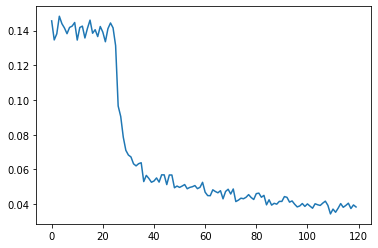

In [62]:
import matplotlib.pyplot as plt
plt.plot(loss_over_time)
plt.show()

#### Print model's state_dict

In [58]:
for param_tensor in lstm_model.state_dict():
    print(param_tensor, "\t", lstm_model.state_dict()[param_tensor].size())

embedding.weight 	 torch.Size([80503, 3])
lstm.weight_ih_l0 	 torch.Size([16, 3])
lstm.weight_hh_l0 	 torch.Size([16, 4])
lstm.bias_ih_l0 	 torch.Size([16])
lstm.bias_hh_l0 	 torch.Size([16])
fc.weight 	 torch.Size([6, 4])
fc.bias 	 torch.Size([6])


#### Save model

In [60]:
torch.save(lstm_model.state_dict(), "models/lstm_model.pt")

### Evaluation

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_classification(y, y_hat, y_proba):
    return {
        "Accuracy": accuracy_score(y, y_hat),
        "Precision": precision_score(y, y_hat),
        "Recall": recall_score(y, y_hat),
        "F1-score": f1_score(y, y_hat),
        "AUC": roc_auc_score(y, y_proba),
    }


In [64]:
import numpy as np
num_classes = len(label_colnames)
# initialize tensor and lists to monitor test loss and accuracy
test_loss = torch.zeros(1)
class_correct = list(0. for i in range(num_classes))
class_total = list(0. for i in range(num_classes))

# set the module to evaluation mode
lstm_model.eval()

# get the input images and their corresponding labels
inputs, labels = test_loader.dataset.tensors

# forward pass to get outputs
outputs = lstm_model(inputs)

# calculate the loss
loss = criterion(outputs, labels)

# update average test loss 
test_loss = test_loss + ((torch.ones(1) / (len(labels) + 1)) * (loss.data - test_loss))

# get the predicted class from the maximum value in the output-list of class scores
metrics = {}
for j in range(num_classes):
    # compare predictions to true label
    predicted_class = np.round(outputs.data[:,j])
    labels_class = labels.data[:,j]
    class_total[j] = len(labels)
    class_correct[j] = (labels_class==predicted_class).sum()
    metrics[label_colnames[j]] = evaluate_classification(labels_class, predicted_class, outputs.data[:,j])
    #(predicted_class == labels_class).sum()
              
print('Test Loss: {:.6f}\n'.format(test_loss.numpy()[0]))

Test Loss: 0.000002



/Users/yc00122/.virtualenvs/py3.6.8-pytorch/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yc00122/.virtualenvs/py3.6.8-pytorch/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yc00122/.virtualenvs/py3.6.8-pytorch/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yc00122/.virtualenvs/py3.6.8-pytorch/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'pre

In [72]:
for label in metrics:
    print(label)
    print(metrics[label])

toxic
{'Accuracy': 0.9477602586920011, 'Precision': 0.7159542743538767, 'Recall': 0.7537938252223967, 'F1-score': 0.7343869487637013, 'AUC': 0.9561843704348368}
severe_toxic
{'Accuracy': 0.990223848795528, 'Precision': 0.5416666666666666, 'Recall': 0.1306532663316583, 'F1-score': 0.21052631578947367, 'AUC': 0.9878841288350857}
obscene
{'Accuracy': 0.9739803975634823, 'Precision': 0.7562776957163959, 'Recall': 0.7388167388167388, 'F1-score': 0.7474452554744526, 'AUC': 0.9775161913126688}
threat
{'Accuracy': 0.9970420875842879, 'Precision': 0.0, 'Recall': 0.0, 'F1-score': 0.0, 'AUC': 0.934731594029978}
insult
{'Accuracy': 0.9682651091670218, 'Precision': 0.6803848209513629, 'Recall': 0.6558475012879958, 'F1-score': 0.667890870933893, 'AUC': 0.9728496631879917}
identity_hate
{'Accuracy': 0.9911262627528639, 'Precision': 0.0, 'Recall': 0.0, 'F1-score': 0.0, 'AUC': 0.9452301475065097}


In [73]:
total_evaluation = {}
for metric in metrics['toxic']:
    total_evaluation[metric] = 0
    for label in metrics:
        total_evaluation[metric] += metrics[label][metric]
    total_evaluation[metric] /= num_classes
print(total_evaluation)

{'Accuracy': 0.9780663274258643, 'Precision': 0.4490472429480504, 'Recall': 0.3798518886097983, 'F1-score': 0.39337489849358676, 'AUC': 0.9623993492178452}
